In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# classic
from skopt.space import Categorical
from skopt import BayesSearchCV
from skopt.plots import plot_objective
# sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
X, y = make_blobs(n_samples=10_000, centers=7, cluster_std=4, n_features=2, random_state=42) # type: ignore
dataset = pd.DataFrame(X,)
dataset["label"] = y
dataset.head()

,0,1,label
0,10.448350,2.029767,1
1,-6.696842,11.160897,0
2,-10.009888,9.474390,0
3,2.995779,6.059662,1
4,-3.898184,-6.506016,2


In [4]:
dataset.describe()

,0,1,label
count,10000.000000,10000.000000,10000.00000
mean,-2.060747,2.780035,2.99940
std,7.371184,7.422249,2.00005
min,-24.527929,-21.633571,0.00000
25%,-7.908613,-2.965228,1.00000
50%,-2.292377,3.865245,3.00000
75%,3.828130,8.409629,5.00000
max,19.035635,27.314534,6.00000


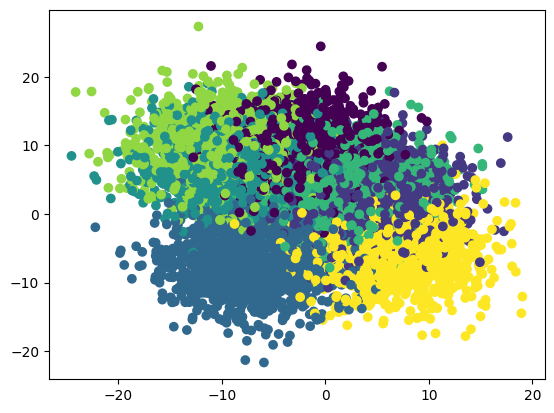

In [5]:
plt.scatter(dataset[0], dataset[1], c=dataset["label"])
plt.show()

# Формируем выборку и обучаеи RandomForest cls

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["label"]), dataset["label"], train_size=0.75)
X_train.shape, X_test.shape

((7500, 2), (2500, 2))

In [7]:
rfc_model = RandomForestClassifier(n_estimators=3, random_state=42)
rfc_model.fit(X_train, y_train)
pred = rfc_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.40      0.53      0.46       347
           1       0.38      0.40      0.39       364
           2       0.84      0.84      0.84       350
           3       0.37      0.38      0.38       333
           4       0.38      0.34      0.36       364
           5       0.50      0.39      0.44       376
           6       0.73      0.67      0.70       366

    accuracy                           0.51      2500
   macro avg       0.51      0.51      0.51      2500
weighted avg       0.51      0.51      0.51      2500



# Проверка бэггинга 

In [ ]:
bagging_optimizer = BayesSearchCV(
    estimator=BaggingClassifier(random_state=42),
    search_spaces={
        "estimator": Categorical([
            DecisionTreeClassifier(max_depth=5, random_state=42),
            MLPClassifier(hidden_layer_sizes=[10, 5], random_state=42, shuffle=True),
            SVC(kernel="linear", random_state=42),
            
        ]),
        "n_estimators": Categorical([1]),
        "bootstrap_features": Categorical([False, True]),
        "max_features": [1, 2],
    },
    random_state=42,
    cv=None,
    n_jobs=8
)
bagging_optimizer.fit(X_train, y_train)

,estimator,BaggingClassi...ndom_state=42)
,search_spaces,"{'bootstrap_features': Categorical(c...), prior=None), 'estimator': Categorical(c...), prior=None), 'max_features': [1, 2], 'n_estimators': Categorical(c...), prior=None)}"
,optimizer_kwargs,None
,n_iter,50
,scoring,None
,fit_params,None
,n_jobs,8
,n_points,1
,iid,'deprecated'
,refit,True
,cv,None


<Axes: >

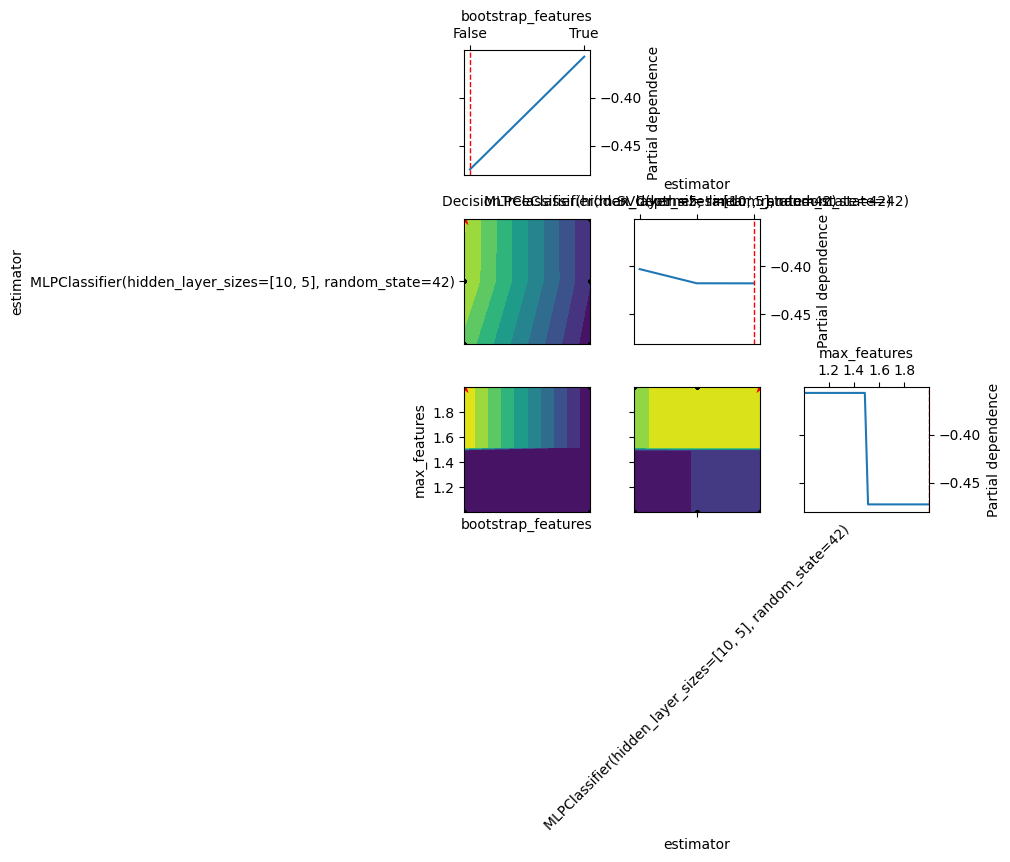

In [24]:
plot_objective(bagging_optimizer.optimizer_results_[0])

In [15]:
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
    n_estimators=100,
    random_state=42,
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55       347
           1       0.44      0.48      0.46       364
           2       0.91      0.85      0.88       350
           3       0.44      0.43      0.44       333
           4       0.44      0.39      0.41       364
           5       0.59      0.54      0.56       376
           6       0.77      0.78      0.77       366

    accuracy                           0.58      2500
   macro avg       0.58      0.58      0.58      2500
weighted avg       0.59      0.58      0.58      2500



In [16]:
model = BaggingClassifier(
    estimator=MLPClassifier(hidden_layer_sizes=[100, 50]),
    n_estimators=100,
    random_state=42,
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       347
           1       0.46      0.50      0.48       364
           2       0.87      0.89      0.88       350
           3       0.48      0.50      0.49       333
           4       0.46      0.40      0.42       364
           5       0.61      0.49      0.54       376
           6       0.78      0.78      0.78       366

    accuracy                           0.59      2500
   macro avg       0.60      0.59      0.59      2500
weighted avg       0.60      0.59      0.59      2500



Обучение длидоль в ~180 раз больше, чем с обчным деревом глубиной 5, но при этом архитектура гораздо сложнее, а качество лучше всего на 0.1

In [17]:
model = BaggingClassifier(
    estimator=SVC(kernel="linear", random_state=42),
    n_estimators=100,
    random_state=42,
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.52      0.62      0.56       347
           1       0.48      0.46      0.47       364
           2       0.86      0.91      0.88       350
           3       0.48      0.48      0.48       333
           4       0.49      0.49      0.49       364
           5       0.60      0.50      0.55       376
           6       0.78      0.77      0.78       366

    accuracy                           0.60      2500
   macro avg       0.60      0.60      0.60      2500
weighted avg       0.60      0.60      0.60      2500



Воо, что то золотое, обучалось быстрее нейронной сети, а macro f1-score лучше!

# Проверка бустингов

In [30]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45       347
           1       0.38      0.46      0.41       364
           2       0.83      0.84      0.83       350
           3       0.38      0.44      0.40       333
           4       0.36      0.31      0.33       364
           5       0.50      0.42      0.46       376
           6       0.70      0.72      0.71       366

    accuracy                           0.52      2500
   macro avg       0.52      0.52      0.51      2500
weighted avg       0.52      0.52      0.51      2500



In [31]:
model = AdaBoostClassifier(
    estimator=MLPClassifier(hidden_layer_sizes=[10, 10], random_state=42),
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.40      0.43      0.42       347
           1       0.41      0.35      0.38       364
           2       0.84      0.83      0.83       350
           3       0.40      0.31      0.35       333
           4       0.39      0.43      0.41       364
           5       0.52      0.59      0.55       376
           6       0.70      0.74      0.72       366

    accuracy                           0.53      2500
   macro avg       0.52      0.53      0.52      2500
weighted avg       0.52      0.53      0.52      2500



In [34]:
model = AdaBoostClassifier(
    estimator=SVC(kernel="linear", random_state=42),
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       347
           1       0.49      0.47      0.48       364
           2       0.88      0.87      0.87       350
           3       0.48      0.52      0.50       333
           4       0.47      0.46      0.46       364
           5       0.62      0.48      0.54       376
           6       0.78      0.79      0.78       366

    accuracy                           0.60      2500
   macro avg       0.60      0.60      0.60      2500
weighted avg       0.60      0.60      0.60      2500



Бустинг показал себя похуже с базовыми моделями дерева и нейронки, метод опорных векторов показал себя лучше всего

# проверка Стекинга

In [39]:
model = StackingClassifier(
    estimators=[
        ("dtc", DecisionTreeClassifier(max_depth=5, random_state=42)),
        ("nn", MLPClassifier(hidden_layer_sizes=[10, 10], random_state=42)),
        ("svc", SVC(kernel="linear", random_state=42))
    ],
    final_estimator=RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
    cv=5,
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56       347
           1       0.45      0.52      0.49       364
           2       0.90      0.87      0.88       350
           3       0.48      0.51      0.49       333
           4       0.47      0.39      0.42       364
           5       0.62      0.47      0.54       376
           6       0.78      0.78      0.78       366

    accuracy                           0.59      2500
   macro avg       0.60      0.60      0.59      2500
weighted avg       0.60      0.59      0.59      2500



# Выводы
Все представленные виды ансамбей справились +- одинково, одинакого не очень. Но тут дело в сложности данных, наврятли получилось бы обучить хороший классификатор на таких смешанных семплах. Визуализирую немного метрик на основе результатов стекинга

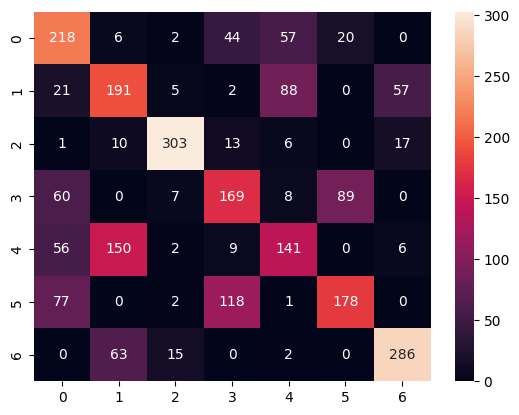

In [48]:
error_matrix = confusion_matrix(y_test, pred)
sns.heatmap(error_matrix, annot=True, fmt=".4g")
plt.show()

In [57]:
stack_pred = model.predict(X)

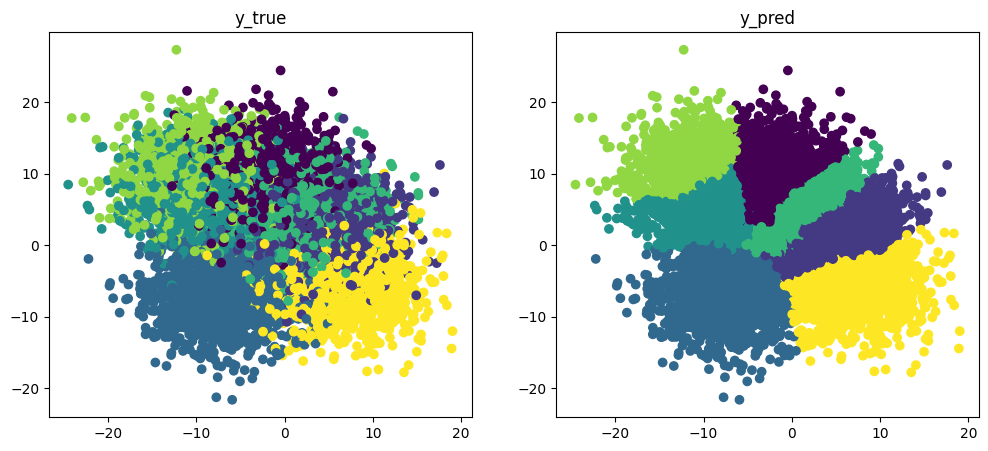

In [58]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_title('y_true')
ax[1].scatter(X[:, 0], X[:, 1], c=stack_pred)
ax[1].set_title('y_pred')
plt.show()

Видно, что моделька не может выдать подобные шумы, все классы плотненькие

# Бонус: нейронная сеть
я очень люблбю pytorch, попробую обучить свой классификатор :)

In [60]:
np.unique_counts(y)

UniqueCountsResult(values=array([0, 1, 2, 3, 4, 5, 6]), counts=array([1429, 1429, 1429, 1429, 1428, 1428, 1428]))

In [83]:
import torch
import torch.nn as nn
import torchvision as tv

from tqdm import tqdm

In [168]:
class MyClassifier(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.linear_1 = nn.Linear(2, 4)
        self.linear_2 = nn.Linear(4, 16)
        self.linear_3 = nn.Linear(16, 7)
        self.act = nn.ReLU() # <---- взял ступенчатый, как у MLPClassifier
        self.drop = nn.Dropout(p=0.3)

    def forward(self, x: torch.Tensor):
        x = self.act(self.drop(self.linear_1(x)))
        x = self.act(self.drop(self.linear_2(x)))
        x = self.act(self.drop(self.linear_3(x)))
        return x


model = MyClassifier()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [118]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.from_numpy(y).long()
X_torch.shape, y.shape

(torch.Size([10000, 2]), (10000,))

In [119]:
dataset = torch.utils.data.TensorDataset(X_torch, y_torch)
train_dataset, test_dataset = torch.utils.data.random_split(
    dataset, 
    [0.8, 0.2],
    generator=torch.Generator().manual_seed(42)
)

In [120]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [121]:
next(iter(train_loader))[0].dtype

torch.float32

In [122]:
data.shape

torch.Size([64, 2])

In [123]:
label.shape

torch.Size([64])

In [148]:
def accuracy(pred, label):
    all = len(pred)
    sm = nn.Softmax()
    postprecess_pred = torch.Tensor(([sm(i).argmax().item() for i in pred])) # да, я немного Индус... и что
    return torch.sum(postprecess_pred==label)/all

In [ ]:
EPOCHES = 1000
losses = {}
train_acc = {}
test_acc = {}


for e in range(EPOCHES):
    running_train_losses = []
    running_train_acc = []

    model.train()
    train_tqdm_loader = tqdm(train_loader)
    for idx, (data, label) in enumerate(train_tqdm_loader):
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()

        running_train_losses.append(loss.item())
        acc = accuracy(pred, label)
        running_train_acc.append(acc)

        if idx % 10 == 0:
            train_tqdm_loader.set_description(f"TRAIN EPOCH [{e+1}/{EPOCHES}] loss={loss.item():.3f} accuracy={acc:.3f}")
    # это мне для визуализации
    losses[e] = np.mean(running_train_losses)
    train_acc[e] = np.mean(running_train_acc)

    with torch.no_grad():
        model.eval()
        running_test_acc = []
        test_tqdm_loader = tqdm(test_loader)
        for idx, (data, label) in enumerate(test_tqdm_loader):
            pred = model(data)
            acc = accuracy(pred, label)
            running_test_acc.append(acc)
            if idx % 10 == 0:
                test_tqdm_loader.set_description(f"TEST EPOCH [{e+1}/{EPOCHES}] accuracy={acc:.3f}")
        test_acc[e] = np.mean(running_test_acc)

TEST EPOCH [100/100] accuracy=0.531: 100%|██████████| 32/32 [00:00<00:00, 388.55it/s]


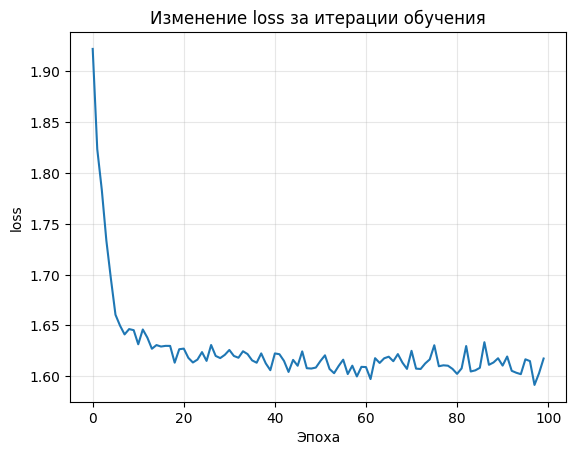

In [170]:
plt.plot(losses.keys(), losses.values(),)
plt.title("Изменение loss за итерации обучения")
plt.xlabel("Эпоха")
plt.ylabel("loss")
plt.grid(alpha=0.3)
plt.show()

классно, пришли к умеренному уменьшению lr за примерно 2- итераций!

# 

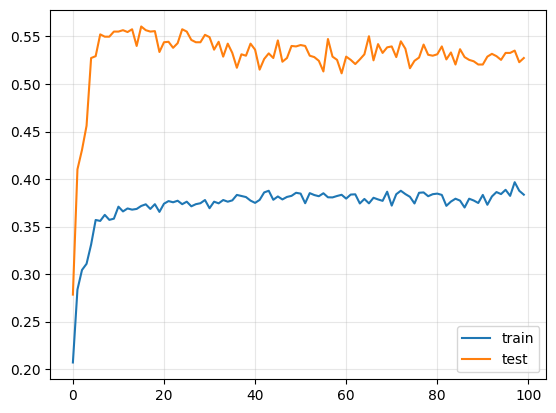

In [177]:
plt.plot(train_acc.keys(), train_acc.values(), label="train")
plt.plot(test_acc.keys(), test_acc.values(), label="test")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Видно, что сетка не переобучается, но до хороших метрик ей все равно далеко